# Project: Finding Potential Donors for Charity

### Steps:
1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

<li><a href="#Problem-Statement">About the dataset</a></li>

## 1. Frame the Problem and Look at the Big Picture:
> Steps:
1. Define the objective in business terms.
2. How will your solution be used?
3. What are the current solutions/workarounds (if any)?
4. How should you frame this problem (supervised/unsupervised, online/offline,
etc.)?
5. How should performance be measured?
6. Is the performance measure aligned with the business objective?
7. What would be the minimum performance needed to reach the business objective?
8. What are comparable problems? Can you reuse experience or tools?
9. Is human expertise available?
10. How would you solve the problem manually?
11. List the assumptions you (or others) have made so far.
12. Verify assumptions if possible.

<div id="Problem-Statement"></div>

## 1. Problem Statement

**Problem Statement:** Charity organizations rely heavily on donations to survive. It is hard to ask everyone for donation and even harder to determine how much to ask. Hence, they requested if ML can help determine who can be the potential donors.

**Proposed Solution:** Using ML we can determine what will be the income level for an individual. We will treat this as a _Classification problem_ **_to determine whether the individual earns more than $50,000 or less._** 

**Model Approach:** We will use **Supervised Classification models** to solve the problem

**Assumptions:** We are assuming that the data is correct and that `$50,000` is an accurate estimate of the seperator for donor vs non-donor.

**Dataset:** The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). 

In [2]:
# Define variable for income classification
incomeVal = 50000

## 2. Get the Data
> Note: automate as much as possible so you can easily get fresh data.
1. List the data you need and how much you need.
2. Find and document where you can get that data.
3. Check how much space it will take.
4. Check legal obligations, and get authorization if necessary.
5. Get access authorizations.
6. Create a workspace (with enough storage space).
7. Get the data.
8. Convert the data to a format you can easily manipulate (without changing the
data itself).
9. Ensure sensitive information is deleted or protected (e.g., anonymized).
10. Check the size and type of data (time series, sample, geographical, etc.).
11. Sample a test set, put it aside, and never look at it (no data snooping!).

## 2. Data Import

### `Import common libraries`

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
pd.options.display.max_columns = None

# Import supplementary visualization code visuals.py
import visuals as vs
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

In [4]:
# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


## 3. Explore the Data

> Note: try to get insights from a field expert for these steps.
1. Create a copy of the data for exploration (sampling it down to a manageable size
if necessary).
2. Create a Jupyter notebook to keep a record of your data exploration.
3. Study each attribute and its characteristics:
>> - Name
>> - Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
>> - % of missing values
>> - Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
>> - Possibly useful for the task?
>> - Type of distribution (Gaussian, uniform, logarithmic, etc.)
4. For supervised learning tasks, identify the target attribute(s).
5. Visualize the data.
6. Study the correlations between attributes.
7. Study how you would solve the problem manually.
8. Identify the promising transformations you may want to apply.
9. Identify extra data that would be useful (go back to “Get the Data”).
10. Document what you have learned.

## 3. Data Exploration

### Exploring data types and data distributions

A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, we compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most m\$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.


In [5]:
# view data types in the set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


#### `We see that there are several features which are categorical:`
- workclass
- education_level
- marital-status
- occupation
- relationship
- race
- sex
- native-country
#### `Also the label column is categorical:`
- income

In [6]:
for columns in data:
    if (isinstance(data.loc[:,columns][0],float) or isinstance(data.loc[:,columns][0],int)):
        pass
    else:
        print(columns+":")
        print(data[columns].sort_values().unique())

age:
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90]
workclass:
[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
education_level:
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
marital-status:
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
occupation:
[' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
relationship:
[' Husband' ' Not-in-family' '

In [7]:
# view the data distribution
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


### Overview of label distribution

A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000.
- The total number of records, `45,222`
- The number of individuals making more than \$50,000 annually, `11,208`.
- The number of individuals making at most \$50,000 annually, `34,014`.
- The percentage of individuals making more than \$50,000 annually, `24.78%`.

In [8]:
n_records = len(data)
n_greater_50k = len(data[data['income']=='>50K'])
n_at_most_50k = len(data[data['income']=='<=50K'])
greater_percent = (float(n_greater_50k)/float(n_records))*100
print('\nThe total number of records: {}'.format(n_records))
print('The number of individuals making more than $50,000 annually: {}'.format(n_greater_50k))
print('The number of individuals making at most $50,000 annually: {}'.format(n_at_most_50k))
print('The Percentage of individuals making more than $50,000 annually: {:.2f}%'.format(greater_percent))


The total number of records: 45222
The number of individuals making more than $50,000 annually: 11208
The number of individuals making at most $50,000 annually: 34014
The Percentage of individuals making more than $50,000 annually: 24.78%


### `Missing Values`: None

In [9]:
print("Features with missing values: \n{}".format(data[data.isnull()].sum()))

Features with missing values: 
age                0.0
workclass          0.0
education_level    0.0
education-num      0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
sex                0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64


### Data Visualization

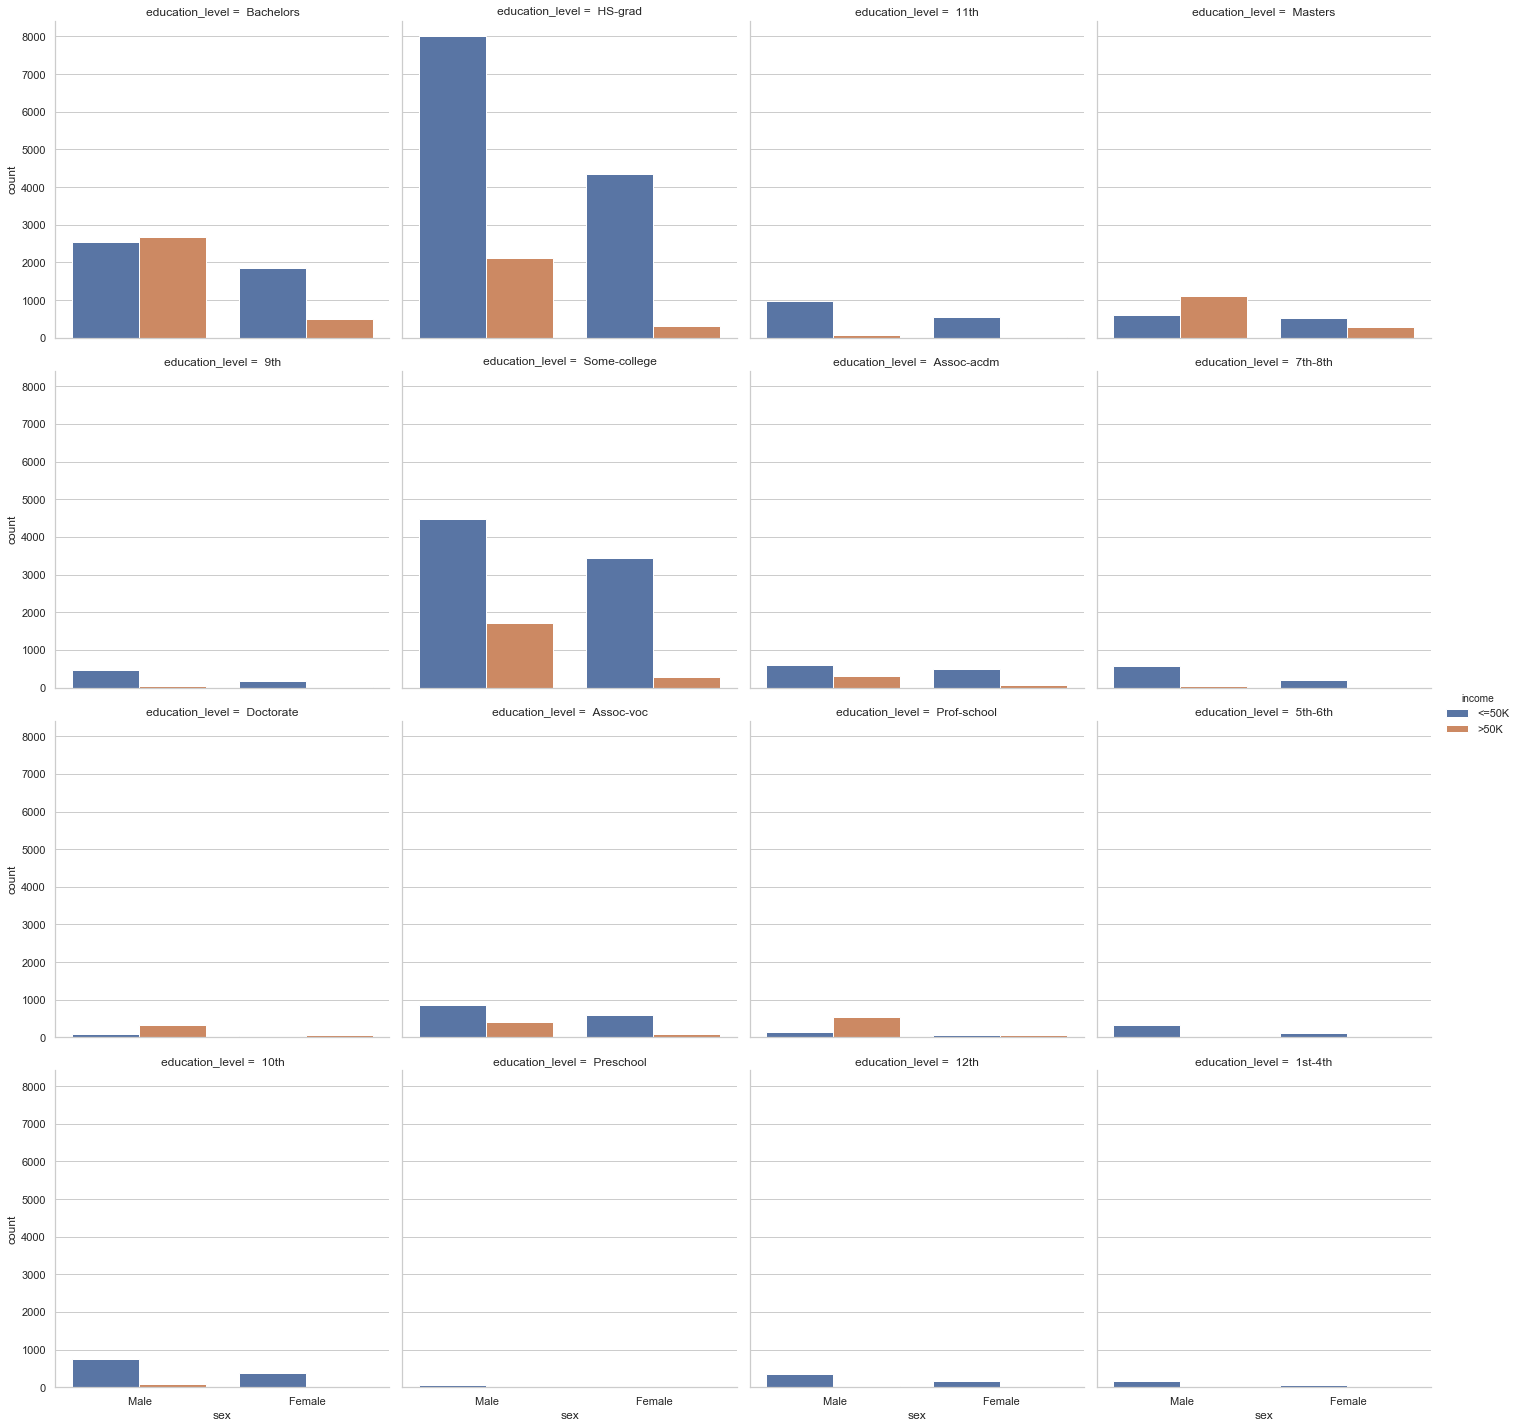

In [10]:
sns.set(style="whitegrid", color_codes=True)
sns.catplot("sex", col="education_level", data=data, 
               hue='income', kind="count", col_wrap=4);

#### Maximum number of high-income individuals have Bachelor degrees

## 3. Prepare the Data
Notes:
 
• Work on copies of the data (keep the original dataset intact).   
• Write functions for all data transformations you apply, for five reasons:
 - So you can easily prepare the data the next time you get a fresh dataset
 - So you can apply these transformations in future projects
 - To clean and prepare the test set
 - To clean and prepare new data instances once your solution is live
 - To make it easy to treat your preparation choices as hyperparameters

1. Data cleaning:
    - Fix or remove outliers (optional).
    - Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or
columns).
2. Feature selection (optional):
    - Drop the attributes that provide no useful information for the task.
3. Feature engineering, where appropriate:
    - Discretize continuous features.
    - Decompose features (e.g., categorical, date/time, etc.).
    - Add promising transformations of features (e.g., log(x), sqrt(x), x^2, etc.).
    - Aggregate features into promising new features.
4. Feature scaling: standardize or normalize features.
5. Encode Categorical data to Numerical

## 3. Data Preparation

### 3.1 Data Cleaning

#### `There is no missing or bad data to clean`

In [11]:
data_clean = data

### 3.2 Drop unnecessary features

#### `Proceed with all features`

In [12]:
data_filter = data_clean #data_clean.drop('column',axis=1)

### 3.3 Feature Engineering (add features, transformations, discretize, decompose)

Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000003BAB3E93C8>,
      dtype=object)

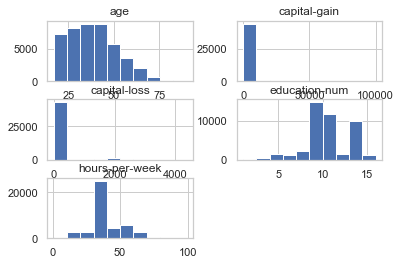

In [13]:
# plot histogram to see distribution
data_filter.hist()

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

`The data for capital-gain and capital-loss is skewed.
We will apply` **`log`** `function to them (with offset to avoid log(0))`

C:\Users\Adb\Documents\Jupyter Notebook\2. Charityml\visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


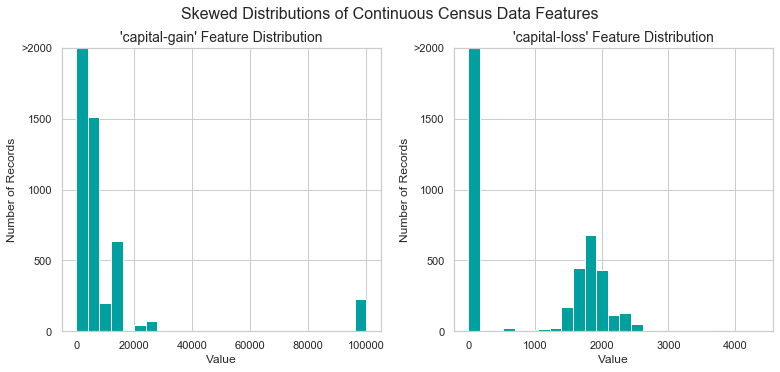

In [14]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

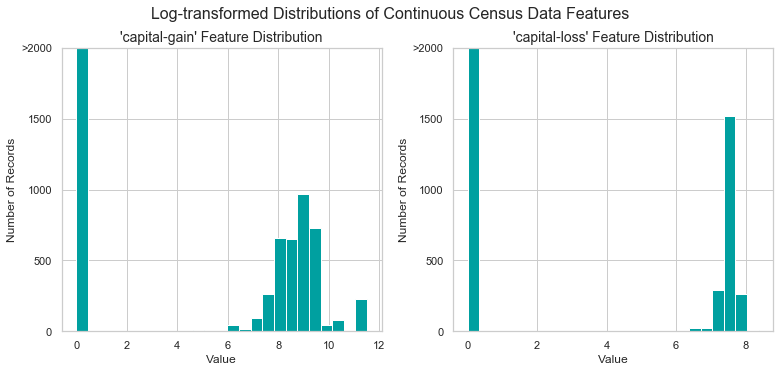

In [15]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### 3.4 Feature Scaling

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning.

In [16]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### 3.5 Data Encoding

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively.

In [17]:
# One-hot encode the 'features_log_minmax_transform'
features_final = pd.get_dummies(features_log_minmax_transform)

# Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x:1 if x==">50K" else 0)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} original features.".format(len(features_raw.columns)))
print("{} total features after one-hot encoding.".format(len(encoded)))

13 original features.
103 total features after one-hot encoding.


In [18]:
features_final.sample(3)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 10th,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,education_level_ 5th-6th,education_level_ 7th-8th,education_level_ 9th,education_level_ Assoc-acdm,education_level_ Assoc-voc,education_level_ Bachelors,education_level_ Doctorate,education_level_ HS-grad,education_level_ Masters,education_level_ Preschool,education_level_ Prof-school,education_level_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
37147,0.383562,0.8,0.000000,0.000000,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11963,0.123288,0.8,0.767138,0.000000,0.653061,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30303,0.315068,0.8,0.000000,0.900201,0.448980,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
label = pd.DataFrame(income,index=features_final.index)
full_data = pd.concat([features_final,label], axis=1, join='outer')
corr_matrix = full_data.corr()
corr_matrix['income'].sort_values(ascending=False)

income                                1.000000
marital-status_ Married-civ-spouse    0.446192
relationship_ Husband                 0.403706
education-num                         0.332800
capital-gain                          0.287740
                                        ...   
occupation_ Other-service            -0.165428
relationship_ Not-in-family          -0.195561
sex_ Female                          -0.215760
relationship_ Own-child              -0.222635
marital-status_ Never-married        -0.319536
Name: income, Length: 104, dtype: float64

`Observation`: Highest correlation to income - marital-status_Married-civ-spouse

### Shuffle and Split Data
Progress:
    * Categorical variables -> numerical features <DONE>
    * Normalize numerical featues <DONE>
    * Shuffle-split data into test-train <TODO>


In [20]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


## 4. Short-List Promising Models
Notes:

• If the data is huge, you may want to sample smaller training sets so you can train
many different models in a reasonable time (be aware that this penalizes complex
models such as large neural nets or Random Forests).
• Once again, try to automate these steps as much as possible.
1. Train many quick and dirty models from different categories (e.g., linear, naive
Bayes, SVM, Random Forests, neural net, etc.) using standard parameters.
2. Measure and compare their performance.
• For each model, use N-fold cross-validation and compute the mean and standard
deviation of the performance measure on the N folds.
3. Analyze the most significant variables for each algorithm.
4. Analyze the types of errors the models make.
• What data would a human have used to avoid these errors?
5. Have a quick round of feature selection and engineering.
6. Have one or two more quick iterations of the five previous steps.
7. Short-list the top three to five most promising models, preferring models that
make different types of errors.

###  Supervised Classification Models
**The following are some of the supervised classification models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that we may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

In [27]:
# TODO: Calculate accuracy
accuracy = float(11208) / float(45222)

# TODO: Calculate F-score using the formula above for beta = 0.5
fscore = float((1+.25)*(float(11208)/float(45222*1)))/float(((.25 * float(11208)/float(45222)) + 1))

# Print the results 
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


In [23]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, average='binary', beta=0.5)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, average='binary', beta=0.5)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

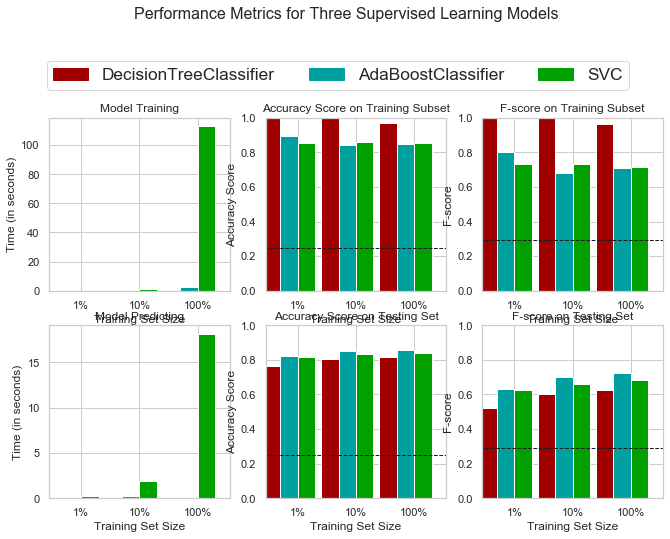

In [29]:
# import multiple models for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

# Initialize the three models
clf_A = DecisionTreeClassifier(random_state=1)
clf_B = AdaBoostClassifier(random_state=1)
clf_C = SVC(random_state=1)

# samples
samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

## 5. Fine-Tune the System
Notes:
• You will want to use as much data as possible for this step, especially as you move
toward the end of fine-tuning.
• As always automate what you can.
1. Fine-tune the hyperparameters using cross-validation.
• Treat your data transformation choices as hyperparameters, especially when
you are not sure about them (e.g., should I replace missing values with zero or
with the median value? Or just drop the rows?).
• Unless there are very few hyperparameter values to explore, prefer random
search over grid search. If training is very long, you may prefer a Bayesian
optimization approach (e.g., using Gaussian process priors, as described by
Jasper Snoek, Hugo Larochelle, and Ryan Adams).1
2. Try Ensemble methods. Combining your best models will often perform better
than running them individually.
3. Once you are confident about your final model, measure its performance on the
test set to estimate the generalization error.

The best model from the above 3 seems to be `AdaBoost`. Grid Search will be used to tune parameters

In [38]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import AdaBoostClassifier

# Initialize the classifier
clf = AdaBoostClassifier(random_state = 1)

# Create the parameters list you wish to tune
parameters = {'n_estimators' : [50,75,100,200], 'learning_rate' : [0.5,0.8,1,1.2]}

# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
display(pd.DataFrame(grid_obj.cv_results_))

Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8646
Final F-score on the testing data: 0.7365


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.242730,0.056348,0.141723,0.009075,0.5,50,"{'learning_rate': 0.5, 'n_estimators': 50}",0.719390,0.744897,0.724889,0.719308,0.730260,0.727749,0.009483,13
1,3.309592,0.020029,0.221509,0.014524,0.5,75,"{'learning_rate': 0.5, 'n_estimators': 75}",0.726280,0.750168,0.723296,0.721022,0.731822,0.730518,0.010470,12
2,4.399372,0.034417,0.284242,0.006972,0.5,100,"{'learning_rate': 0.5, 'n_estimators': 100}",0.728784,0.752171,0.726108,0.723152,0.735746,0.733192,0.010365,8
3,8.770355,0.046045,0.560953,0.006706,0.5,200,"{'learning_rate': 0.5, 'n_estimators': 200}",0.733280,0.760168,0.732827,0.731970,0.737791,0.739207,0.010673,4
4,2.196888,0.011423,0.148767,0.005609,0.8,50,"{'learning_rate': 0.8, 'n_estimators': 50}",0.716092,0.742838,0.713361,0.721206,0.731161,0.724932,0.010820,16
5,3.318399,0.037152,0.214398,0.005308,0.8,75,"{'learning_rate': 0.8, 'n_estimators': 75}",0.726051,0.746220,0.725040,0.729617,0.734444,0.732274,0.007711,9
6,4.384073,0.035506,0.283805,0.003184,0.8,100,"{'learning_rate': 0.8, 'n_estimators': 100}",0.732408,0.745965,0.732417,0.731145,0.738720,0.736131,0.005585,7
7,8.773490,0.043199,0.551480,0.005098,0.8,200,"{'learning_rate': 0.8, 'n_estimators': 200}",0.739793,0.757751,0.731549,0.738877,0.745539,0.742702,0.008741,2
8,2.207778,0.023553,0.149119,0.013057,1,50,"{'learning_rate': 1, 'n_estimators': 50}",0.720906,0.738421,0.717054,0.717181,0.733395,0.725392,0.008842,15
9,3.306475,0.032713,0.213520,0.007874,1,75,"{'learning_rate': 1, 'n_estimators': 75}",0.730062,0.742233,0.724844,0.724311,0.737167,0.731724,0.007001,11


#### Summary
For this classification case, we saw that ADABoost was the best ML model. It was able to predict with an accuraccy of 86.46%